READ.ME

This file helps you explore the functions of Brightway 2.5 in an intuitive way. So far, we have linked a background database with a simple foreground model in the previous sections of this repository.

It is not a tutorial to go through, but a collection of usable code which you can adapt for your own projects. The goal is to make Brightway 2.5 easy to use for your own projects. Any contribution to this overview is welcome.


# Analysis

Before analyzing a Brightway model, ensure all required packages, databases, and projects are installed. These have already been set up in other scripts in this repository, so we can call them directly from the project folder stored in Brightway without re-importing or re-matching background databases.

### 1. Loading the project

This section loads the necessary packages and project (defined earlier in 01_ecoinvent and 02_excel_importer). Here, the focus is on Brightway’s analysis tools.

In [49]:
# basic packages from brightway
import bw2analyzer as ba
import bw2calc as bc
import bw2data as bd
import bw2io as bi
from bw2io.importers import SingleOutputEcospold2Importer
import bw2analyzer as bwa
from bw2data import methods

# other relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

In [50]:
# call the project we want to work in, in this case brightway25 where we have set up the databases
bd.projects.set_current('LCA_Toolbox')

### 2. Database overview

This section provides an overview of the background and foreground databases stored in the Brightway project.

In [51]:
bd.databases

Databases dictionary with 4 object(s):
	biosphere3
	bw25_db
	ecoinvent-3.10-biosphere
	ecoinvent310clca

In [52]:
bd.projects.current

'LCA_Toolbox'

In [53]:
ei_clca = bd.Database('ecoinvent310clca')
ei_bio = bd.Database('ecoinvent-3.10-biosphere')
db_template = bd.Database('bw25_db')
el_bio3 = bd.Database('biosphere3')

### 3. Database exploration

The functionalities described through the code below show how the databases can be searched and how individual activities can be extracted and studied.

In [54]:
# search for activities in the database
db_template.search('ceramics')

['porcelain ceramics production' (kilogram, RER, None)]

In [80]:
ei_clca.search('welding')

['welding, arc, steel' (meter, RoW, None),
 'welding, arc, steel' (meter, RER, None),
 'welding, arc, aluminium' (meter, RER, None),
 'welding, arc, aluminium' (meter, RoW, None),
 'market for welding, arc, steel' (meter, GLO, None),
 'market for welding, arc, aluminium' (meter, GLO, None),
 'welding, gas, steel' (meter, RER, None),
 'welding, gas, steel' (meter, RoW, None),
 'market for welding, gas, steel' (meter, GLO, None),
 'welding, arc, aluminium' (meter, CA-QC, None),
 'market for helium' (kilogram, GLO, None),
 'market for titania slag, 85% titanium dioxide' (kilogram, GLO, None),
 'market for helium, crude stockpiling' (kilogram, GLO, None),
 'market for helium, crude' (kilogram, GLO, None),
 'ferry production' (unit, GLO, None),
 'container ship production' (unit, GLO, None),
 'tanker production, for petroleum' (unit, GLO, None),
 'bulk carrier production, for dry goods' (unit, GLO, None),
 'tanker production, for liquefied natural gas' (unit, GLO, None),
 'tanker production

In [56]:
# select a random activity from the database
ei_clca.random()

'catch crop growing, sunflower, August-October, organic fertiliser 30 kg N' (kilogram, RoW, None)

In [57]:
# export the LCI to Microsoft Excel in an overview format
bi.export.excel.write_lci_excel(db_template.name,
                                objs=[steel_treat],
                                dirpath=Path.cwd())

'c:\\Users\\TimWeber\\repos_20LCA\\LCA_Toolbox\\lci-bw25_db.xlsx'

In [58]:
# print the outputs of the process
list(steel.production())

[Exchange: 1.0 kilogram 'market for land tenure, arable land, measured as carbon net primary productivity, annual crop' (kilogram, DE, None) to 'market for land tenure, arable land, measured as carbon net primary productivity, annual crop' (kilogram, DE, None)>]

In [59]:
# print the consumers of a product
list(steel.consumers())


[Exchange: 275.499997 kilogram 'market for land tenure, arable land, measured as carbon net primary productivity, annual crop' (kilogram, DE, None) to 'land use change, annual crop' (hectare, DE, None)>]

In [60]:
# (1) this is a way to print all exchanges of a process, there are multiple ways to extract this information
list(steel.edges())


[Exchange: 1.0 kilogram 'market for land tenure, arable land, measured as carbon net primary productivity, annual crop' (kilogram, DE, None) to 'market for land tenure, arable land, measured as carbon net primary productivity, annual crop' (kilogram, DE, None)>,
 Exchange: 0.938421897695875 kilogram 'land already in use, annual cropland to annual crop' (kilogram, DE, None) to 'market for land tenure, arable land, measured as carbon net primary productivity, annual crop' (kilogram, DE, None)>,
 Exchange: 0.0615781023041247 kilogram 'land already in use, perennial cropland to annual crop' (kilogram, DE, None) to 'market for land tenure, arable land, measured as carbon net primary productivity, annual crop' (kilogram, DE, None)>]

In [61]:
# (2) this is an other way to print all exchanges of a process
exchanges = sorted(ceramics_bw.exchanges(), key=lambda exc: exc['amount'], reverse=True)
for exc in exchanges:
    print(exc)

Exchange: 1.0277 kilowatt hour 'market group for electricity, high voltage' (kilowatt hour, RER, None) to 'porcelain ceramics production' (kilogram, RER, None)>
Exchange: 1 kilogram 'porcelain ceramics production' (kilogram, RER, None) to 'porcelain ceramics production' (kilogram, RER, None)>
Exchange: 0.5775000000000001 kilogram 'market for kaolin' (kilogram, GLO, None) to 'porcelain ceramics production' (kilogram, RER, None)>
Exchange: 0.45066666666666666 cubic meter 'market group for natural gas, high pressure' (cubic meter, Europe without Switzerland, None) to 'porcelain ceramics production' (kilogram, RER, None)>
Exchange: 0.275 kilogram 'market for feldspar' (kilogram, GLO, None) to 'porcelain ceramics production' (kilogram, RER, None)>
Exchange: 0.24750000000000003 kilogram 'market for silica sand' (kilogram, GLO, None) to 'porcelain ceramics production' (kilogram, RER, None)>
Exchange: 0.01261 kilogram 'Sulfur dioxide' (kilogram, None, ('air',)) to 'porcelain ceramics productio

In [62]:
# (3) Alternative way to display all exchanges with the technosphere
list(ceramics_ei.technosphere())


[Exchange: -0.000177 kilogram 'market for bilge oil' (kilogram, CH, None) to 'sanitary ceramics production' (kilogram, CH, None)>,
 Exchange: 4e-09 unit 'ceramic factory construction' (unit, CH, None) to 'sanitary ceramics production' (kilogram, CH, None)>,
 Exchange: 0.00303 kilogram 'market for chemical, inorganic' (kilogram, GLO, None) to 'sanitary ceramics production' (kilogram, CH, None)>,
 Exchange: 0.425 kilogram 'market for clay' (kilogram, CH, None) to 'sanitary ceramics production' (kilogram, CH, None)>,
 Exchange: 0.878 kilowatt hour 'market for electricity, medium voltage' (kilowatt hour, CH, None) to 'sanitary ceramics production' (kilogram, CH, None)>,
 Exchange: 0.379 kilogram 'market for feldspar' (kilogram, GLO, None) to 'sanitary ceramics production' (kilogram, CH, None)>,
 Exchange: -0.000102 kilogram 'market for hazardous waste, for underground deposit' (kilogram, RER, None) to 'sanitary ceramics production' (kilogram, CH, None)>,
 Exchange: 22.895 megajoule 'market

### 4. Impact assessment methods

To calculate the Life Cycle Impacts the back- and foreground need to be linked to an assessment method. There is a large number of available methods that are pre-installed together with the ecoinvent biosphere flows in the 01_bw25_ecoinvent_importer script.

In [63]:
# here we will analyse the set of methods that are available as part of the background
list(bd.methods)[:5]

[('CML v4.8 2016 no LT',
  'acidification no LT',
  'acidification (incl. fate, average Europe total, A&B) no LT'),
 ('CML v4.8 2016 no LT',
  'climate change no LT',
  'global warming potential (GWP100) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: freshwater no LT',
  'freshwater aquatic ecotoxicity (FAETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: marine no LT',
  'marine aquatic ecotoxicity (MAETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: terrestrial no LT',
  'terrestrial ecotoxicity (TETP inf) no LT')]

In [64]:
# printing all methods that contain a specific keyword, e.g. "climate change"
climate_methods = [m for m in bd.methods if any("climate change" in str(part).lower() for part in m)]
for method in climate_methods:
    print(method)

('CML v4.8 2016 no LT', 'climate change no LT', 'global warming potential (GWP100) no LT')
('CML v4.8 2016', 'climate change', 'global warming potential (GWP100)')
('Ecological Scarcity 2021 no LT', 'climate change no LT', 'global warming potential (GWP100) no LT')
('Ecological Scarcity 2021', 'climate change', 'global warming potential (GWP100)')
('EF v3.0 no LT', 'climate change no LT', 'global warming potential (GWP100) no LT')
('EF v3.0 no LT', 'climate change: biogenic no LT', 'global warming potential (GWP100) no LT')
('EF v3.0 no LT', 'climate change: fossil no LT', 'global warming potential (GWP100) no LT')
('EF v3.0 no LT', 'climate change: land use and land use change no LT', 'global warming potential (GWP100) no LT')
('EF v3.0', 'climate change', 'global warming potential (GWP100)')
('EF v3.0', 'climate change: biogenic', 'global warming potential (GWP100)')
('EF v3.0', 'climate change: fossil', 'global warming potential (GWP100)')
('EF v3.0', 'climate change: land use and l

In [65]:
# selecting the impact assessment methods that we want to use in our analysis
lcia_gwp100 = ('EF v3.1', 'climate change', 'global warming potential (GWP100)')
lcia_water = ('EF v3.1','water use','user deprivation potential (deprivation-weighted water consumption)')
lcia_land = ('EF v3.1', 'land use', 'soil quality index')

### 5. LCIA

This section shows how LCA results can be calculated quickly and be displayed as final score, process- and elementary flow based.

In [66]:
# Quick LCIA calculation
ceramics_bw_lca = ceramics_bw.lca(lcia_gwp100)
ceramics_bw_lca.score


0.7265791393172021

In [67]:
ceramics_ei_lca = ceramics_ei.lca(lcia_gwp100)
ceramics_ei_lca.score

3.204853545579472

In [68]:
# Elementary flows contribution analysis by process
ceramics_ei_lca.to_dataframe().pivot_table(index=['col_name', 'row_name'], values='amount', aggfunc='sum').sort_values(by='amount', ascending=False)

,,amount
col_name,row_name,
"heat and power co-generation, natural gas, 200kW electrical, lean burn","Carbon dioxide, fossil",2.485570
natural gas venting from petroleum/natural gas production,"Methane, fossil",0.178738
"natural gas, burned in gas turbine","Carbon dioxide, fossil",0.131738
"heat and power co-generation, natural gas, 200kW electrical, lean burn","Methane, fossil",0.105814
"transport, pipeline, onshore, long distance, natural gas","Methane, fossil",0.087236
...,...,...
"electricity production, wood, future",Dinitrogen monoxide,-0.001518
"electricity production, natural gas, combined cycle power plant",Dinitrogen monoxide,-0.002206
"market for electricity, high voltage",Dinitrogen monoxide,-0.004463


In [69]:
# Elementary flows contribution analysis as summary table
ceramics_ei_lca.to_dataframe().pivot_table(index='row_name',values='amount',aggfunc='sum')

,amount
row_name,
"Carbon dioxide, fossil",2.605547
Dinitrogen monoxide,0.051966
"Methane, fossil",0.491032
Sulfur hexafluoride,0.001161
Tetrafluoromethane,0.000556
Trifluoromethane,0.002012


### 6. Contribution analysis

There are different ways to analyse the contribution analysis in Brightway 2.5. Two ways are displayed below. The max_level and cutoff can be adjusted based on the level of detail you want from the analysis.

In [70]:
# One option to do a contribution analysis is to use the recursive calculation method
bwa.print_recursive_calculation(ceramics_bw,
lcia_method=lcia_gwp100,max_level=3,cutoff=0.05)

Fraction of score | Absolute score | Amount | Activity
0001 | 0.7266 |     1 | 'porcelain ceramics production' (kilogram, RER, None)
  00.2 | 0.1451 | 0.5775 | 'market for kaolin' (kilogram, GLO, None)
    0.123 | 0.08954 | 0.3783 | 'kaolin production' (kilogram, RoW, None)
      0.0546 | 0.0397 | 0.05354 | 'market group for electricity, medium voltage' (kilowatt hour, RAS, None)
    0.0699 | 0.05079 | 0.1992 | 'kaolin production' (kilogram, RER, None)
  0.331 | 0.2407 | 1.028 | 'market group for electricity, high voltage' (kilowatt hour, RER, None)
    0.327 | 0.2376 | 1.013 | 'market group for electricity, high voltage' (kilowatt hour, Europe without Switzerland, None)
      0.124 | 0.08975 | 0.1495 | 'market for electricity, high voltage' (kilowatt hour, UA, None)
  0.389 | 0.283 | 0.4507 | 'market group for natural gas, high pressure' (cubic meter, Europe without Switzerland, None)
    0.0665 | 0.04834 | 0.06835 | 'market for natural gas, high pressure' (cubic meter, IT, None)
    

In [71]:
# One option to do a contribution analysis is to use the recursive calculation method
bwa.print_recursive_calculation(ceramics_ei,
lcia_method=lcia_gwp100,max_level=3,cutoff=0.05)

Fraction of score | Absolute score | Amount | Activity
0001 | 3.205 |     1 | 'sanitary ceramics production' (kilogram, CH, None)
  0.0587 | 0.1882 | 0.878 | 'market for electricity, medium voltage' (kilowatt hour, CH, None)
    0.0579 | 0.1855 | 0.8816 | 'electricity voltage transformation from high to medium voltage' (kilowatt hour, CH, None)
      0.0579 | 0.1855 | 0.8869 | 'market for electricity, high voltage' (kilowatt hour, CH, None)
  0.852 |  2.73 | 22.89 | 'market for heat, district or industrial, natural gas' (megajoule, CH, None)
    0.852 |  2.73 | 22.89 | 'heat and power co-generation, natural gas, 200kW electrical, lean burn' (megajoule, CH, None)
      -0.264 | -0.8445 | -4.037 | 'market for electricity, high voltage' (kilowatt hour, CH, None)
      0.283 | 0.9079 | 1.129 | 'market for natural gas, low pressure' (cubic meter, CH, None)


In [72]:
# Another option is to use the recursive calculation to an object, which returns a DataFrame
ceramics_bw_ca = bwa.utils.recursive_calculation_to_object(ceramics_bw,
                                          lcia_method=lcia_gwp100,
                                          max_level=1,
                                          cutoff=0.02,
                                          as_dataframe=True,
                                          )
ceramics_bw_ca

,label,parent,score,fraction,amount,name,key
0,root,None,0.726579,1.000000,1.000000e+00,porcelain ceramics production,"(bw25_db, a1b7153986d8f8387752b14278a0b4c2)"
1,root_a,root,0.145070,0.199662,5.775000e-01,market for kaolin,"(ecoinvent310clca, ab4384f247d3857b5d30e291407..."
2,root_b,root,0.015081,0.020756,2.750000e-01,market for feldspar,"(ecoinvent310clca, d1b241d797d752c6515a7bb3d13..."
3,root_d,root,0.240714,0.331297,1.027700e+00,"market group for electricity, high voltage","(ecoinvent310clca, 1e1014b29f9e44d8265fcd8d871..."
4,root_e,root,0.282982,0.389472,4.506667e-01,"market group for natural gas, high pressure","(ecoinvent310clca, 1fc2418e39967f8ff8432afc4b6..."
5,root_f,root,0.031445,0.043279,1.250000e-10,packaging glass factory construction,"(ecoinvent310clca, d1d37459bfab78d834c25f0a808..."


In [73]:
# The goal here is to conduct the same analysis for the ecoinvent process so we can compare the contributions later
ceramics_ei_ca = bwa.utils.recursive_calculation_to_object(ceramics_ei,
                                          lcia_method=lcia_gwp100,
                                          max_level=1,
                                          cutoff=0.02,
                                          as_dataframe=True,
                                          )
ceramics_ei_ca

,label,parent,score,fraction,amount,name,key
0,root,None,3.204854,1.000000,1.000000e+00,sanitary ceramics production,"(ecoinvent310clca, f4c28131c8632ceafd5ba9e2824..."
1,root_b,root,0.096369,0.030070,4.000000e-09,ceramic factory construction,"(ecoinvent310clca, 761b89a10caf803ec946412afce..."
2,root_e,root,0.188177,0.058716,8.780000e-01,"market for electricity, medium voltage","(ecoinvent310clca, f5470659c2f13b8d76123cdf597..."
3,root_h,root,2.730413,0.851962,2.289500e+01,"market for heat, district or industrial, natur...","(ecoinvent310clca, 7f5f59a9e27382bbf6e0548c257..."
4,root_j,root,0.111534,0.034802,4.440000e-01,market for kaolin,"(ecoinvent310clca, ab4384f247d3857b5d30e291407..."


### 7. Plot Contribution analysis graphs

In [74]:
# Filter out the parent processes that are not relevant for the contribution analysis
ceramics_bw_ca = ceramics_bw_ca.dropna(subset='parent') 
ceramics_ei_ca = ceramics_ei_ca.dropna(subset='parent')

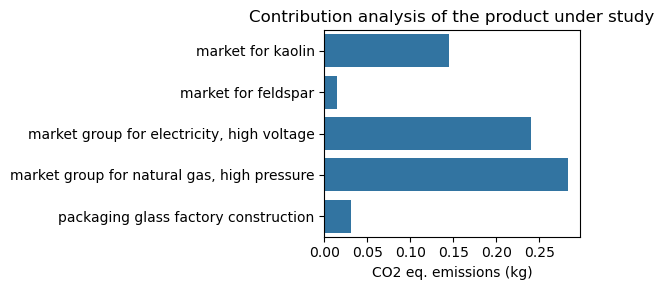

In [75]:
# First, we plot the contribution analysis for the brigthway ceramics production process
f, ax = plt.subplots(figsize=(6, 3))
sns.barplot(y='name', x='score', data=ceramics_bw_ca, ax=ax)
ax.set(
    title='Contribution analysis of the product under study',
    xlabel='CO2 eq. emissions (kg)',
    ylabel='')
plt.tight_layout()
plt.show()


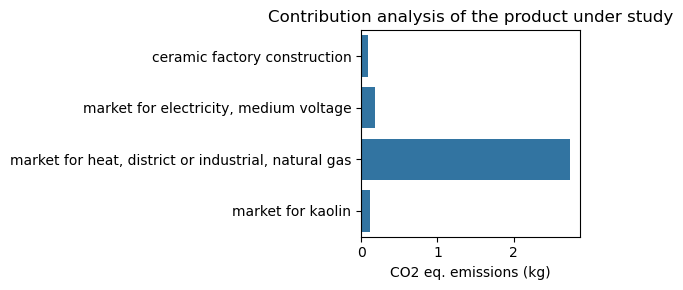

In [76]:
# Then, we plot the same for the ecoinvent ceramics production process
f, ax = plt.subplots(figsize=(6, 3))
sns.barplot(y='name', x='score', data=ceramics_ei_ca, ax=ax)
ax.set(
    title='Contribution analysis of the product under study',
    xlabel='CO2 eq. emissions (kg)',
    ylabel='')
plt.tight_layout()
plt.show()


### 8. Comparison

Only your creativity limits you in what you can do with the results from the impact assessment and contribution analysis. The data can also be stored in a combined dataframe (=combined_df) to then be shown in the same graph conveniently.

In [77]:
combined_df = pd.concat([ceramics_bw_ca.set_index('name').score,ceramics_ei_ca.set_index('name').score],
                        keys=['ceramics_bw','ceramics_ei'],
                        names=['activity','contributor'])
combined_df

activity     contributor                                         
ceramics_bw  market for kaolin                                       0.145070
             market for feldspar                                     0.015081
             market group for electricity, high voltage              0.240714
             market group for natural gas, high pressure             0.282982
             packaging glass factory construction                    0.031445
ceramics_ei  ceramic factory construction                            0.096369
             market for electricity, medium voltage                  0.188177
             market for heat, district or industrial, natural gas    2.730413
             market for kaolin                                       0.111534
Name: score, dtype: float64

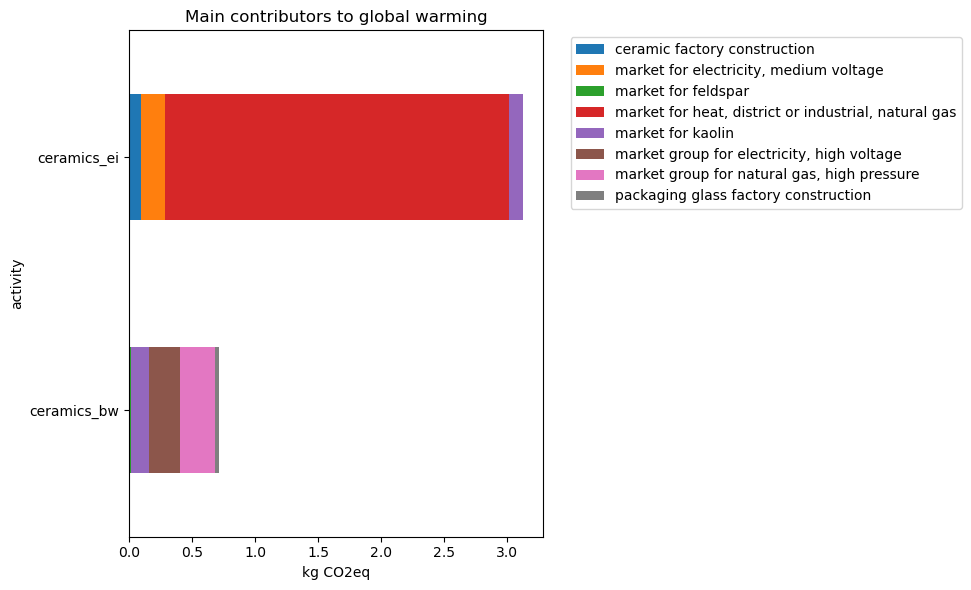

In [78]:
ax = combined_df.unstack().plot.barh(
    stacked=True,
    title='Main contributors to global warming',
    xlabel='kg CO2eq',
    figsize=(10,6)
)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # moves legend outside
plt.tight_layout()
plt.show()